---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    readonly/train.csv - the training set (all tickets issued 2004-2011)
    readonly/test.csv - the test set (all tickets issued 2012-2016)
    readonly/addresses.csv & readonly/latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `readonly/train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `readonly/test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 999)

# Your code here
trainset = pd.read_csv('readonly/train.csv', encoding = 'ISO-8859-1')
testset = pd.read_csv('readonly/test.csv', encoding = 'ISO-8859-1')
address = pd.read_csv('readonly/addresses.csv')
latlot = pd.read_csv('readonly/latlons.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
trainset.head(3)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,IL,60606,NaN,USA,2004-03-16 11:40:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,MI,48208,NaN,USA,2004-04-23 12:30:00,2005-05-06 13:30:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,MI,48223,NaN,USA,2004-04-26 13:40:00,2005-03-29 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [10]:
print('number of examples in trainset: {}\n'.format(trainset.shape[0]))
print('number of features in trainset: {}\n'.format(trainset.shape[1]))
print('number of examples in testset: {}\n'.format(testset.shape[0]))
print('number of features in testset: {}\n'.format(testset.shape[1]))
print('Column names of data: {}'.format(trainset.columns))

number of examples in trainset: 250306

number of features in trainset: 34

number of examples in testset: 61001

number of features in testset: 27

Column names of data: Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')


In [2]:
trainset.compliance.value_counts(dropna=False, normalize=True)

 0.0    0.592407
NaN     0.361262
 1.0    0.046331
Name: compliance, dtype: float64

In [9]:
address.head(3)

,ticket_id,address
0,22056,"2900 tyler, Detroit MI"
1,27586,"4311 central, Detroit MI"
2,22062,"1449 longfellow, Detroit MI"


In [11]:
print('number of examples and features of address: {}'.format(address.shape))

number of examples and features of address: (311307, 2)


In [14]:
print('number of unique address: {}'.format(address.address.nunique()))

number of unique address: 121769


In [16]:
print('number of unique id: {}'.format(address.ticket_id.nunique()))

number of unique id: 311307


In [21]:
print('randomly select 10 samples to display address patterns: \n')

for i in range(10):
    print('sample ', str(i))
    print(address.sample(2), '\n')

randomly select 10 samples to display address patterns: 

sample  0
        ticket_id                    address
142876     172429     2121 helen, Detroit MI
218281     253112  7754 archdale, Detroit MI 

sample  1
        ticket_id                          address
307163     370214  19452 pierson, Detroit MI 48219
120741     148231         15473 chapel, Detroit MI 

sample  2
        ticket_id                   address
139113     168993  12161 minden, Detroit MI
26361       45329   8675 elmira, Detroit MI 

sample  3
        ticket_id                         address
310462     373965  17300 woodward ave, Detroit MI
251293     287288      20006 roselawn, Detroit MI 

sample  4
        ticket_id                   address
164042     195403  19367 carrie, Detroit MI
99248      124901    2029 beard, Detroit MI 

sample  5
        ticket_id                     address
32415       52837    21131 moross, Detroit MI
137472     165933  14256 washburn, Detroit MI 

sample  6
        ticket_id   

In [22]:
latlot.head(3)

,address,lat,lon
0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,"14512 sussex, Detroit MI",42.394657,-83.194265
2,"3456 garland, Detroit MI",42.373779,-82.986228


In [23]:
print('number of examples and features of latlot: {}'.format(latlot.shape))
print('number of unique address: {}'.format(latlot.address.nunique()))
print('number of unique lat: {}, number of unique lon: {}'.format(latlot.lat.nunique(), latlot.lon.nunique()))

number of examples and features of latlot: (121769, 3)
number of unique address: 121769
number of unique lat: 91285, number of unique lon: 103152


In [26]:
print('number of repeated ticket_id exist both in train set and test set: {}'.format(len(set(trainset.ticket_id).intersection(
        testset.ticket_id))))

number of repeated ticket_id exist both in train set and test set: 0


In [29]:
print('number of test set ticket_id exist in address: {}'.format(len(set(testset.ticket_id).intersection(
            address.ticket_id))))

number of test set ticket_id exist in address: 61001


Total number of numerical features: 14 
 ['ticket_id', 'violation_street_number', 'violation_zip_code', 'mailing_address_str_number', 'fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount', 'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due', 'compliance']

drop the numerical features that is nominal categorical feature.

Final numerical features: ['fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount', 'judgment_amount', 'payment_amount']



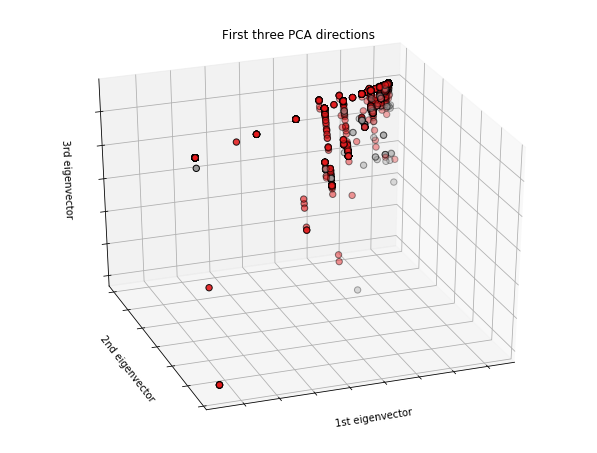

In [19]:
# visualisation of the classes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

X = trainset[numerical_features].dropna()
y = trainset.loc[X.index, 'compliance']

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

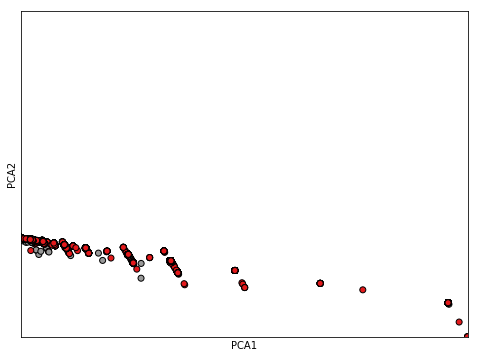

In [23]:
X_reduced = PCA(n_components=2).fit_transform(X)

x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Next, I will build a dummy model as baseline. I will be using sklearn.DummyClassifier, using the majority class as baseline, and submit to get the assignment score.

In [3]:
from sklearn.model_selection import train_test_split
state = 35

trainset_complete_case = trainset.dropna(axis=0, subset=['compliance']) #drop nan
candidate_features = ['fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount', 'judgment_amount']

X_train, X_test, y_train, y_test = train_test_split(
    trainset_complete_case[candidate_features], 
    trainset_complete_case['compliance'], 
    test_size=0.3, 
    random_state=state)

print('training set features: {} \n training set examples: {}'.format(X_train.shape[1], X_train.shape[0]))

training set features: 6 
 training set examples: 111916


In [3]:
y_train.value_counts()

0.0    103806
1.0      8110
Name: compliance, dtype: int64

In [4]:
y_test.value_counts()

0.0    44477
1.0     3487
Name: compliance, dtype: int64

In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score

state = 35

strategies = ['stratified', 'most_frequent', 'prior']

dumclfs = {}
for strategy in strategies:
    clf = DummyClassifier(strategy=strategy, random_state = state)
    clf.fit(X_train, y_train)
    y_preds = clf.predict(X_test)
    auc = roc_auc_score(y_test, y_preds)
    dumclfs[strategy]=auc

print('dummy classifiers auc roc scores in validation set: ')
for stra, val in sorted(dumclfs.items(), key=lambda item: item[1], reverse=True):
    print('strategy: {}: {:.2f}'.format(stra, val))

dummy classifiers auc roc scores in validation set: 
strategy: stratified: 0.50
strategy: most_frequent: 0.50
strategy: prior: 0.50


In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
auc = roc_auc_score(y_test, lr_predicted)
dumclfs['logistic_regession']=auc

print('Logistic regression classifier (default settings)\n', auc)

Logistic regression classifier (default settings)
 0.54935726923


In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
auc = roc_auc_score(y_test, tree_predicted)
dumclfs['decision_tree']=auc

print('Decision tree classifier (max_depth = 2)\n', auc)

Decision tree classifier (max_depth = 2)
 0.543233495646


In [ ]:
## doesn't work ##
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
auc = roc_auc_score(y_test, svc_predicted)
dumclfs['svc']=auc

print('SVC Linear Kernel (C = 1)\n', auc)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
auc = roc_auc_score(y_test, rf_predicted)
dumclfs['rf']=auc

print('RF Classifier \n', auc)

RF Classifier 
 0.552531344779


In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
auc = roc_auc_score(y_test, knn_predicted)
dumclfs['knn']=auc

print('knn Classifier \n', auc)

knn Classifier 
 0.557817492392


In [6]:
from sklearn.ensemble import GradientBoostingClassifier

gdb = GradientBoostingClassifier().fit(X_train, y_train)
gdb_predicted = gdb.predict(X_test)
auc = roc_auc_score(y_test, gdb_predicted)
dumclfs['gdb']=auc

print('gdb Classifier \n', auc)

gdb Classifier 
 0.552531344779


In [7]:
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB().fit(X_train, y_train)
nbclf_predicted = nbclf.predict(X_test)
auc = roc_auc_score(y_test, nbclf_predicted)
dumclfs['nbclf']=auc

print('nbclf Classifier \n', auc)

nbclf Classifier 
 0.543233495646


In [9]:
## PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [10]:
gdb_pca3 = GradientBoostingClassifier().fit(X_train_reduced, y_train)
gdb_pca3_predicted = gdb_pca3.predict(X_test_reduced)
auc = roc_auc_score(y_test, gdb_pca3_predicted)
dumclfs['gdb_pca3']=auc

print('gdb_pca3 Classifier \n', auc)

gdb_pca3 Classifier 
 0.55237671328


In [2]:
# merge address, latlot with trainset

address_latlon = pd.merge(address, latlot, on='address', how='left')
train_merged = pd.merge(trainset, address_latlon, on='ticket_id', how='left')
test_merged = pd.merge(testset, address_latlon, on ='ticket_id', how='left')
print
(
    f'shape of train merged {train_merged.shape} \n',
    f'shape of test merged {test_merged.shape}')

('shape of train merged (250306, 37) \n', 'shape of test merged (61001, 30)')

In [6]:
train_merged.head(3)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,address,lat,lon
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,IL,60606,NaN,USA,2004-03-16 11:40:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,MI,48208,NaN,USA,2004-04-23 12:30:00,2005-05-06 13:30:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0,"4311 central, Detroit MI",42.326937,-83.135118
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,MI,48223,NaN,USA,2004-04-26 13:40:00,2005-03-29 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,"1449 longfellow, Detroit MI",42.380516,-83.096069


In [3]:
print('number of low cardinality features and its unique values: \n')

print('In training set: \n')

for col in train_merged.columns:
    if train_merged[col].nunique() <= 5:
        print('{} has only {} known unique values: \n {}'.format(col, train_merged[col].nunique(), train_merged[col].unique()))
        
print('\nIn test set: \n')

for col in test_merged.columns:
    if test_merged[col].nunique() <= 5:
        print('{} has only {} known unique values: \n {}'.format(col, test_merged[col].nunique(), test_merged[col].unique()))

number of low cardinality features and its unique values: 

In training set: 

agency_name has only 5 known unique values: 
 ['Buildings, Safety Engineering & Env Department' 'Health Department'
 'Department of Public Works' 'Detroit Police Department'
 'Neighborhood City Halls']
violation_zip_code has only 0 known unique values: 
 [ nan]
non_us_str_code has only 2 known unique values: 
 [nan ', Australia' 'ONTARIO, Canada']
country has only 5 known unique values: 
 ['USA' 'Cana' 'Aust' 'Egyp' 'Germ']
admin_fee has only 2 known unique values: 
 [ 20.   0.]
state_fee has only 2 known unique values: 
 [ 10.   0.]
clean_up_cost has only 1 known unique values: 
 [ 0.]
payment_status has only 3 known unique values: 
 ['NO PAYMENT APPLIED' 'PAID IN FULL' 'PARTIAL PAYMENT APPLIED']
collection_status has only 1 known unique values: 
 [nan 'IN COLLECTION']
grafitti_status has only 1 known unique values: 
 [nan 'GRAFFITI TICKET']
compliance has only 2 known unique values: 
 [  0.   1.  nan]

In 

In [3]:
# drop the rows in trainset where country is not 'USA'
print('Total number of tickets whose country is not USA: {}'.format(sum(train_merged.country != 'USA')))
train_merged_prep = train_merged[train_merged.country == 'USA']

# drop the agency name from train set that is not in  ['Department of Public Works', 'Buildings, Safety Engineering & Env Department', 'Detroit Police Department']
print('Total number of agency names that were not involved: ')
print(sum(train_merged_prep.agency_name.map(lambda name: name not in ['Department of Public Works',\
                                                                'Buildings, Safety Engineering & Env Department',\
                                                                'Detroit Police Department'])))
train_merged_prep = train_merged_prep[train_merged_prep.agency_name.map(lambda name: name in ['Department of Public Works',\
                                                                        'Buildings, Safety Engineering & Env Department',\
                                                                        'Detroit Police Department'])]

print('After dropping other countries, the training dataset shape: {}'.format(train_merged_prep.shape))

Total number of tickets whose country is not USA: 13
Total number of agency names that were not involved: 
8905
After dropping other countries, the training dataset shape: (241388, 37)


In [63]:
# what's the relation between collection_status and compliance

train_merged_prep.replace({'collection_status': np.nan}, 'collection_unknown').groupby(
    ['collection_status', 'compliance']).size().unstack('collection_status')

collection_status,IN COLLECTION,collection_unknown
compliance,,
0.0,35477,106157
1.0,118,11009


In [17]:
print(
    f'Disposition Distribution in Training Set:\n',
    f'{train_merged_prep.disposition.value_counts()}\n',
    f'Total types: {train_merged_prep.disposition.nunique()}')

Disposition Distribution in Training Set:
 Responsible by Default                132568
Not responsible by Dismissal           47358
Not responsible by City Dismissal      34132
Responsible by Admission               12804
Responsible by Determination            7194
Not responsible by Determination        6498
PENDING JUDGMENT                         359
SET-ASIDE (PENDING JUDGMENT)             280
Responsible (Fine Waived) by Deter       195
Name: disposition, dtype: int64
 Total types: 9


In [43]:
print(
    f'Disposition Distribution in Test Set:\n',
    f'{test_merged.disposition.value_counts()} \n',
    f'Total types: {test_merged.disposition.nunique()} \n',
    f'\nAre there any different levels between train and test set?: \n \
    {set(test_merged.disposition.unique()).symmetric_difference(set(train_merged_prep.disposition.unique()))}')

Disposition Distribution in Test Set:
 Responsible by Default                51602
Responsible by Admission               4484
Responsible by Determination           4124
Responsible (Fine Waived) by Deter      781
Responsible - Compl/Adj by Default        6
Responsible - Compl/Adj by Determi        2
Responsible (Fine Waived) by Admis        1
Responsible by Dismissal                  1
Name: disposition, dtype: int64 
 Total types: 8 
 
Are there any different levels between train and test set?: 
     {'Responsible - Compl/Adj by Default', 'Responsible by Dismissal', 'Not responsible by Determination', 'Not responsible by Dismissal', 'SET-ASIDE (PENDING JUDGMENT)', 'PENDING JUDGMENT', 'Responsible - Compl/Adj by Determi', 'Not responsible by City Dismissal', 'Responsible (Fine Waived) by Admis'}


In [4]:
# more feature engineering

x2 = pd.to_datetime(train_merged_prep.hearing_date)
x1 = pd.to_datetime(train_merged_prep.ticket_issued_date)
train_merged_prep['waiting_time'] = (x2-x1).astype('timedelta64[D]')
#train_merged_prep.loc[np.where(train_merged_prep.waiting_time == 'NaT'),'waiting_time'] = train_merged_prep.waiting_time.mean()


x2 = pd.to_datetime(test_merged.hearing_date)
x1 = pd.to_datetime(test_merged.ticket_issued_date)
test_merged['waiting_time'] = (x2-x1).astype('timedelta64[D]')
#train_merged_prep.loc[np.where(train_merged_prep.waiting_time == 'NaT'),'waiting_time'] = train_merged_prep.waiting_time.mean()

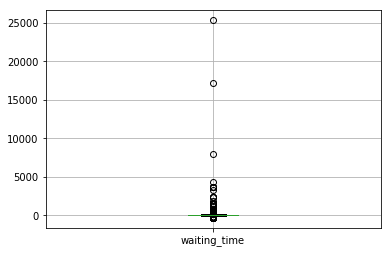

In [56]:
import matplotlib.pyplot as plt
train_merged_prep[['waiting_time']].boxplot()
plt.show()

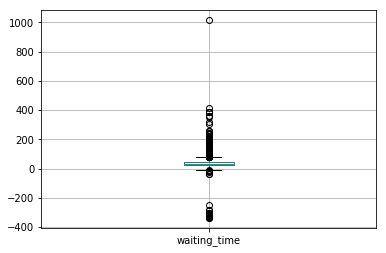

In [58]:
test_merged[['waiting_time']].boxplot()
plt.show()

In [62]:
train_merged_prep.groupby('compliance')['waiting_time'].agg(['min','mean', 'median', 'max', 'std'])

,min,mean,median,max,std
compliance,,,,,
0.0,-337.0,72.569808,54.0,4325.0,58.813121
1.0,-336.0,72.471237,49.0,7933.0,98.011098


Below features are not available in test set. Remove features.

- payment_amount - Amount paid, if any
- payment_date - Date payment was made, if it was received
- payment_status - Current payment status as of Feb 1 2017
- balance_due - Fines and fees still owed
- collection_status - Flag for payments in collections
- compliance [target variable for prediction] 
     * Null = Not responsible
     * 0 = Responsible, non-compliant
     * 1 = Responsible, compliant
- compliance_detail - More information on why each ticket was marked compliant or non-compliant

In [5]:
known_features = (train_merged_prep.columns).intersection(set(test_merged.columns)).values.tolist()
unknown_features = (train_merged_prep.columns).difference(set(test_merged.columns)).values.tolist()
unknown_features.remove('compliance')

print('total known features: {} \n'.format(len(known_features)))
print(known_features)
print('\ntotal unknown features: {} \n'.format(len(unknown_features)))
print(unknown_features)

numerical_features = [col for col in known_features if (
        train_merged_prep[col].dtype in ['int64', 'float64']) & (('fee' in col) | ('amount' in col))]
print('Total number of known numerical features: {} \n {}\n'.format(len(numerical_features), numerical_features))

print('Add below features that might also be useful: ')
catI = ['agency_name', 'lat', 'lon', 'state', 'violation_code', 'grafitti_status']
print(f'\n{catI}')

featI = numerical_features + catI
target = 'compliance'

train_featI = train_merged_prep[featI+[target]]
test_featI = test_merged[featI]

print(f'\nshape of train: {train_featI.shape}\n',
     f'shape of test: {test_featI.shape}')

total known features: 31 

['judgment_amount', 'discount_amount', 'ticket_id', 'lat', 'fine_amount', 'grafitti_status', 'violation_code', 'mailing_address_str_number', 'state', 'disposition', 'violator_name', 'address', 'zip_code', 'hearing_date', 'clean_up_cost', 'admin_fee', 'violation_zip_code', 'inspector_name', 'ticket_issued_date', 'city', 'violation_street_number', 'late_fee', 'violation_street_name', 'non_us_str_code', 'lon', 'mailing_address_str_name', 'country', 'state_fee', 'agency_name', 'violation_description', 'waiting_time']

total unknown features: 6 

['balance_due', 'collection_status', 'compliance_detail', 'payment_amount', 'payment_date', 'payment_status']
Total number of known numerical features: 6 
 ['judgment_amount', 'discount_amount', 'fine_amount', 'admin_fee', 'late_fee', 'state_fee']

Add below features that might also be useful: 

['agency_name', 'lat', 'lon', 'state', 'violation_code', 'grafitti_status']

shape of train: (241388, 13)
 shape of test: (61001

The unknown features match with the provided unknown features mentioned in the assignment. They will be deleted from training model.

In [71]:
train_featI.dtypes

fine_amount        float64
state_fee          float64
admin_fee          float64
discount_amount    float64
judgment_amount    float64
late_fee           float64
agency_name         object
lat                float64
lon                float64
state               object
violation_code      object
grafitti_status     object
compliance         float64
dtype: object

In [74]:
train_featI.head(3)

,fine_amount,state_fee,admin_fee,discount_amount,judgment_amount,late_fee,agency_name,lat,lon,state,violation_code,grafitti_status,compliance
0,250.0,10.0,20.0,0.0,305.0,25.0,"Buildings, Safety Engineering & Env Department",42.390729,-83.124268,IL,9-1-36(a),NaN,0.0
1,750.0,10.0,20.0,0.0,855.0,75.0,"Buildings, Safety Engineering & Env Department",42.326937,-83.135118,MI,61-63.0600,NaN,1.0
2,250.0,0.0,0.0,0.0,0.0,0.0,"Buildings, Safety Engineering & Env Department",42.380516,-83.096069,MI,9-1-36(a),NaN,NaN


In [6]:
# drop the rows in train whose target is unknow
print('number of rows in train set that is missig target: {}'.format(sum(train_featI.compliance.isnull())))
train_featI_prep = train_featI[train_featI.compliance.notnull()]

# fillna
# check the grafitti status (is it helpful to keep?)

number of rows in train set that is missig target: 88627


In [107]:
# check the discount amount if any is notnull, any variety -- convert to indicator, pct
pct = np.round(train_featI_prep.discount_amount / train_featI_prep.fine_amount, 2)
train_featI_prep[(pct.notnull()) & (pct==0.12)].sample(3)

,discount_amount,late_fee,state_fee,judgment_amount,admin_fee,fine_amount,agency_name,lat,lon,state,violation_code,grafitti_status,compliance
87242,3.0,0.0,10.0,55.0,20.0,25.0,"Buildings, Safety Engineering & Env Department",42.361820,-83.015057,MI,9-1-201(a),NaN,1.0
78484,3.0,0.0,10.0,55.0,20.0,25.0,"Buildings, Safety Engineering & Env Department",42.361820,-83.015057,MI,9-1-107,NaN,1.0
33870,3.0,0.0,10.0,55.0,20.0,25.0,"Buildings, Safety Engineering & Env Department",42.391384,-83.184700,MI,9-1-209,NaN,1.0


If there is discount, that will be 10% of the fine amount.

In [24]:
pct = np.round(test_featI.discount_amount / test_featI.fine_amount, 2)
pct[pct.notnull()].value_counts()

0.00    59457
0.10      761
0.12        1
dtype: int64

This discount rate also applies in test set. We can change this numerical feature as binary indicator, 1 for discounted, 0 for none-discount.

In [7]:
for dataset in [train_featI_prep, test_featI]:
    dataset['discounted'] = (dataset['discount_amount'] > 0).astype(int)
    print(dataset['discounted'].value_counts())

0    151596
1      1165
Name: discounted, dtype: int64
0    60239
1      762
Name: discounted, dtype: int64


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [33]:
# check the late fee if all are notnull, any variety -- convert to indicator, pct
print('Late fee and fine amount samples: \n')
print(train_featI_prep.loc[train_featI_prep.late_fee >0, ['fine_amount', 'late_fee']].sample(10))

print('Calculate Pct: ')

pct = np.round(train_featI_prep.late_fee / train_featI_prep.fine_amount, 2)
print(pct[pct.notnull()].value_counts())

Late fee and fine amount samples: 

        fine_amount  late_fee
185880        100.0      10.0
65202         250.0      25.0
110833        250.0      25.0
104328       1000.0     100.0
174904        250.0      25.0
191041        125.0      12.5
69244         200.0      20.0
1197          100.0      10.0
216973        250.0      25.0
217225        500.0      50.0
Calculate Pct: 
0.1    138200
0.0     14366
dtype: int64


We can handle this late_fee feature the same as discount_amount feature, to transform it into binary indicator, 1 for late, 0 for not late or unknown.

In [8]:
for dataset in [train_featI_prep, test_featI]:
    dataset['late'] = (dataset['late_fee'] > 0).astype(int)
    print(dataset['late'].value_counts())

1    138200
0     14561
Name: late, dtype: int64
1    52947
0     8054
Name: late, dtype: int64


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [38]:
# check the grafitti status (is it helpful to keep?)
print(train_featI_prep.grafitti_status.value_counts(dropna=False))
train_featI_prep[train_featI_prep.grafitti_status.notnull()]

NaN    152761
Name: grafitti_status, dtype: int64


,discount_amount,late_fee,state_fee,judgment_amount,admin_fee,fine_amount,agency_name,lat,lon,state,violation_code,grafitti_status,compliance,discounted,late


This grafiti categorical feature does not contain any information. We will drop it from both train and test set.

In [9]:
for dataset in [train_featI_prep, test_featI]:
    dataset.drop(['grafitti_status'], axis=1, inplace = True)
print(train_featI_prep.columns)

Index(['judgment_amount', 'discount_amount', 'fine_amount', 'admin_fee',
       'late_fee', 'state_fee', 'agency_name', 'lat', 'lon', 'state',
       'violation_code', 'compliance', 'discounted', 'late'],
      dtype='object')


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [111]:
# check viloation code
print(f'total violation code in train set: \n {train_featI_prep.violation_code.nunique()}\n',
     f'total violation code in test set: \n {test_featI.violation_code.nunique()}')
print(f' are all the violation code in test set exist in train set? : \n \
{test_featI.violation_code.unique().all() in train_featI_prep.violation_code.unique()}')

total violation code in train set: 
 188
 total violation code in test set: 
 151
 are all the violation code in test set exist in train set? : 
 True


In [53]:
# what is the pattern of violation code? Fine the main pattern for encoding later.
for i in range(30):
    print(train_featI_prep.violation_code.sample(1).values)

['9-1-104']
['9-1-81(a)']
['9-1-36(a)']
['22-2-88']
['9-1-36(a)']
['22-2-88']
['9-1-36(a)']
['22-2-88']
['9-1-81(a)']
['9-1-81(a)']
['22-2-88']
['22-2-43']
['9-1-105']
['9-1-103(C)']
['9-1-36(a)']
['22-2-45']
['9-1-36(a)']
['9-1-36(a)']
['9-1-81(a)']
['9-1-104']
['9-1-36(a)']
['9-1-36(a)']
['22-2-88']
['9-1-110(a)']
['22-2-88(b)']
['9-1-105']
['9-1-36(a)']
['9-1-36(a)']
['22-2-83(a)(b)(c)']
['9-1-36(a)']


The code is composed by [d+-d+-d+{(w), 3}]. We will extract the first two number, and check the number of variety.

In [60]:
train_featI_prep.violation_code[:20]

0      9-1-36(a)
1     61-63.0600
5      9-1-36(a)
6     61-63.0500
7     61-63.0100
8     61-63.0100
9     61-63.0600
12    61-63.0600
13    61-63.0600
14    61-63.0600
18    61-63.0100
19    61-63.0100
21    61-63.0600
22    61-63.0600
23    61-63.0600
28     9-1-36(a)
30     9-1-36(a)
31     9-1-36(a)
33     9-1-36(a)
34     9-1-36(a)
Name: violation_code, dtype: object

In [13]:
import re

def violation_code_extract(code):
    try:
        result = re.match(r'^(\d+-\d+)', code).group()
    except:
        result = None
    return result

violation = train_featI_prep.violation_code.apply(violation_code_extract)
violation.value_counts()

9-1       115821
22-2       33967
61-81        440
61-5         359
61-63        130
61-4         128
61-8          99
22-3          20
61-80         14
61-101         7
61-82          6
61-84          4
61-130         4
61-86          4
61-90          3
61-121         3
61-83          2
61-118         1
61-104         1
61-47          1
61-45          1
61-120         1
61-114         1
61-111         1
Name: violation_code, dtype: int64

In [69]:
violation = test_featI.violation_code.apply(violation_code_extract)
violation.value_counts()

9-1       36491
22-2      23760
61-5        597
61-81        17
61-4         13
61-8         12
61-85        10
61-83         3
61-84         3
61-112        3
61-82         3
61-103        3
61-101        2
61-14         2
61-86         1
61-100        1
61-13         1
61-118        1
61-130        1
61-102        1
61-119        1
61-104        1
Name: violation_code, dtype: int64

Since code '61-x' has more levels than the other two code, and total number is far smaller than those two codes, we can consider to combine all these 61-x code into 61, so we will end up with three levels for the violation code.

In [14]:
for dataset in [train_featI_prep, test_featI]:
    dataset['simplified_code'] = dataset['violation_code'].apply(lambda code: code.split('-')[0] if '-' in code else code)
    print(dataset.groupby('simplified_code')['judgment_amount'].agg(['min', 'mean', 'median', 'max', 'std', 'count']))

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                   min        mean  median      max          std   count
simplified_code                                                         
19420901         360.0  549.375000   580.0    580.0    74.963880      16
19450901         330.0  369.950617   360.0   1680.0    79.451470    1620
19830901          55.0   82.000000    57.5    140.0    40.031238      10
19840901          57.5   57.500000    57.5     57.5     0.000000       2
19850901          85.0   85.000000    85.0     85.0          NaN       1
20130901          55.0   78.782051    85.0    250.0    26.456726      78
20160901          57.5   57.500000    57.5     57.5          NaN       1
20180901          55.0   56.833333    57.5     57.5     1.144344      15
22                 0.0  956.863115   250.0  11030.0  1428.035426   33987
61                 0.0  292.611570   140.0   1680.0   318.240042    1210
9                  0.0  271.235118   305.0   3330.0   118.561867  115821
                    min         mean  median      m

In [15]:
for dataset in [train_featI_prep, test_featI]:
    dataset['simplified_code'] = dataset['simplified_code'].apply(lambda x: x if x in ['9', '22', '61'] else '0')
    print(dataset.groupby('simplified_code')['judgment_amount'].agg(['min', 'mean', 'median', 'max', 'std', 'count']))

                  min        mean  median      max          std   count
simplified_code                                                        
0                55.0  353.519793   360.0   1680.0   106.353270    1743
22                0.0  956.863115   250.0  11030.0  1428.035426   33987
61                0.0  292.611570   140.0   1680.0   318.240042    1210
9                 0.0  271.235118   305.0   3330.0   118.561867  115821
                  min        mean  median      max         std  count
simplified_code                                                      
0                57.5  466.081081   530.0   1680.0  406.640741     74
22                0.0  472.882407   250.0  11030.0  520.476610  23760
61                0.0  409.027367   250.0   1680.0  335.481753    676
9                 0.0  265.142019   140.0  15558.8  397.373307  36491


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [116]:
train_featI_prep.columns

Index(['discount_amount', 'late_fee', 'state_fee', 'judgment_amount',
       'admin_fee', 'fine_amount', 'agency_name', 'lat', 'lon', 'state',
       'violation_code', 'compliance', 'discounted', 'late',
       'simplified_code'],
      dtype='object')

In [16]:
featII = ['judgment_amount', 'agency_name', 'lat', 'lon', 'discounted', 'late', 'simplified_code']
train_featII = train_featI_prep[featII+[target]]
test_featII = test_featI[featII]

print('shape of training: {}'.format(train_featII.shape))
print('\nshape of testing: {}'.format(test_featII.shape))

shape of training: (152761, 8)

shape of testing: (61001, 7)


In [17]:
# fillna
print('number of missing values in training set: \n{}'
      .format(train_featII.isnull().sum(axis=0)))

print('\nnumber of missing values in test set: \n{}'
      .format(test_featII.isnull().sum(axis=0)))

for dataset in [train_featII, test_featII]:
    dataset.loc[dataset.lat.isnull(), 'lat'] = dataset['lat'].mean()
    dataset.loc[dataset.lon.isnull(), 'lon'] = dataset['lon'].mean()
    
print('\nAny na left? \n{}'.format(train_featII.isnull().sum().any() * test_featII.isnull().sum().any()))

number of missing values in training set: 
judgment_amount    0
agency_name        0
lat                2
lon                2
discounted         0
late               0
simplified_code    0
compliance         0
dtype: int64

number of missing values in test set: 
judgment_amount    0
agency_name        0
lat                5
lon                5
discounted         0
late               0
simplified_code    0
dtype: int64


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Any na left? 
False


In [25]:
#encode categorical data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X, y = train_featII.drop([target], axis=1), train_featII[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, \
                                                   stratify=y, random_state=35)

lbe_agency = LabelEncoder().fit(X_train['agency_name'].append(X_test['agency_name']))
X_train['agency_name'] = lbe_agency.transform(X_train['agency_name'])
X_test['agency_name'] = lbe_agency.transform(X_test['agency_name'])

lbe_violation = LabelEncoder().fit(X_train['simplified_code'].append(X_test['simplified_code']))
X_train['simplified_code'] = lbe_violation.transform(X_train['simplified_code'])
X_test['simplified_code'] = lbe_violation.transform(X_test['simplified_code'])

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [28]:
X_train.head(3)

,judgment_amount,agency_name,lat,lon,discounted,late,simplified_code
208405,280.0,0,42.432434,-83.089062,0,0,3
170303,3880.0,1,42.417696,-83.149030,0,1,1
52711,305.0,0,42.337391,-83.228810,0,1,3


In [37]:
from sklearn.preprocessing import OneHotEncoder

cat_mask = [col in ['agency_name', 'simplified_code'] for col in X_train.columns]
ohe = OneHotEncoder(categorical_features = cat_mask, sparse=False) 
ohe.fit(X_train) # It returns an numpy array

X_train_ohe = ohe.transform(X_train) # It returns an numpy array
X_test_ohe = ohe.transform(X_test) # It returns an numpy array

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

regr_rf = RandomForestRegressor()
grid_values = {'n_estimators': [10, 100], 'max_depth': [None, 30]}
grid_clf_auc = GridSearchCV(regr_rf, param_grid=grid_values, scoring='roc_auc')
grid_clf_auc.fit(X_train, y_train)
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Grid best parameter (max. AUC):  {'max_depth': 30, 'n_estimators': 100}
Grid best score (AUC):  0.781415827532
